In [2]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

Here we're going to explore the data and work on feature engineering (if needed)

In [152]:
# df = pd.read_csv('../data/Features_For_Traditional_ML_Techniques_v3.csv')
df = pd.read_parquet(corrected_file_path)

In [20]:
df.shape
df.info()

(134198, 60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 60 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   statement               134198 non-null  object 
 1   BinaryNumTarget         134198 non-null  int8   
 2   tweet                   134198 non-null  object 
 3   followers_count         134198 non-null  int64  
 4   friends_count           134198 non-null  int32  
 5   favourites_count        134198 non-null  int32  
 6   statuses_count          134198 non-null  int32  
 7   listed_count            134198 non-null  int32  
 8   BotScore                134198 non-null  float32
 9   BotScoreBinary          134198 non-null  int8   
 10  cred                    134198 non-null  float32
 11  normalize_influence     134198 non-null  float32
 12  mentions                134198 non-null  int16  
 13  quotes                  134198 non-null  int16  
 14  replies             

There are 4 obvious groups of features:

- Group 1, spaCy tags : identify categories present in texts, such as mentions of dates, names, organizations, and nationalities (18 features).
- Group 2, linguistic features (word length, number of words, question marks, exclamation points, etc.) : these characterize the text of the tweets, including the number of words in a tweet, average word length, question marks, periods and more (24 features)
- Group 3, Twitter specific features : include metrics such as the number of likes, retweets, hashtags, and other twitter-specific interactions (13 features).
- Group 4, Auxiliaries : include the credibility score and normalized influence (more details in the referenced paper by the research team) (4 features).

We wwant to see the distribution of data across the features and correlations (if there are any).

There are a lot of feaures, and we want to see them all. So it will be done in goups and batches

## Group 1, spaCy Tags
### Group 1, Batch 1

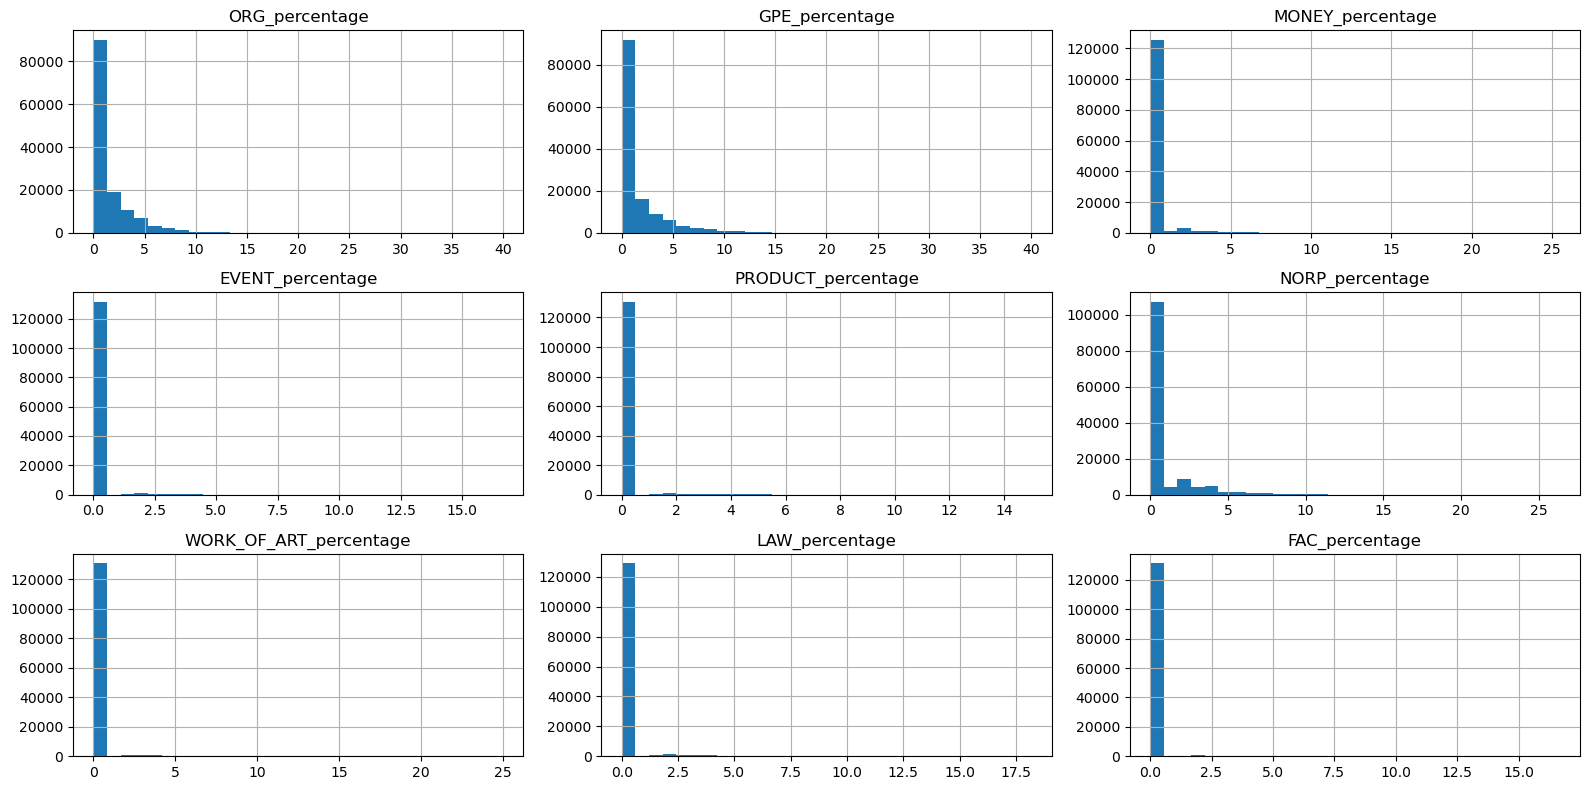

In [23]:
df.hist(['ORG_percentage', 'GPE_percentage', 'MONEY_percentage', 'EVENT_percentage', 'PRODUCT_percentage', 'NORP_percentage', 'WORK_OF_ART_percentage', 'LAW_percentage', 
'FAC_percentage'], figsize=(16, 8), bins=30)
plt.tight_layout();

In [26]:
# What share of some selected features is non-zero?
print(f"EVENT non zero records: {round(len(df[df['EVENT_percentage'] > 0])/len(df), 3)*100}%")
print(f"PRODUCT non zero records: {round(len(df[df['PRODUCT_percentage'] > 0])/len(df), 3)*100}%")
print(f"WORK non zero records: {round(len(df[df['WORK_OF_ART_percentage'] > 0])/len(df), 3)*100}%")
print(f"LAW non zero records: {round(len(df[df['LAW_percentage'] > 0])/len(df), 3)*100}%")
print(f"FAC non zero records: {round(len(df[df['FAC_percentage'] > 0])/len(df), 3)*100}%")

EVENT non zero records: 1.9%
PRODUCT non zero records: 2.6%
WORK non zero records: 2.6%
LAW non zero records: 3.8%
FAC non zero records: 2.1999999999999997%


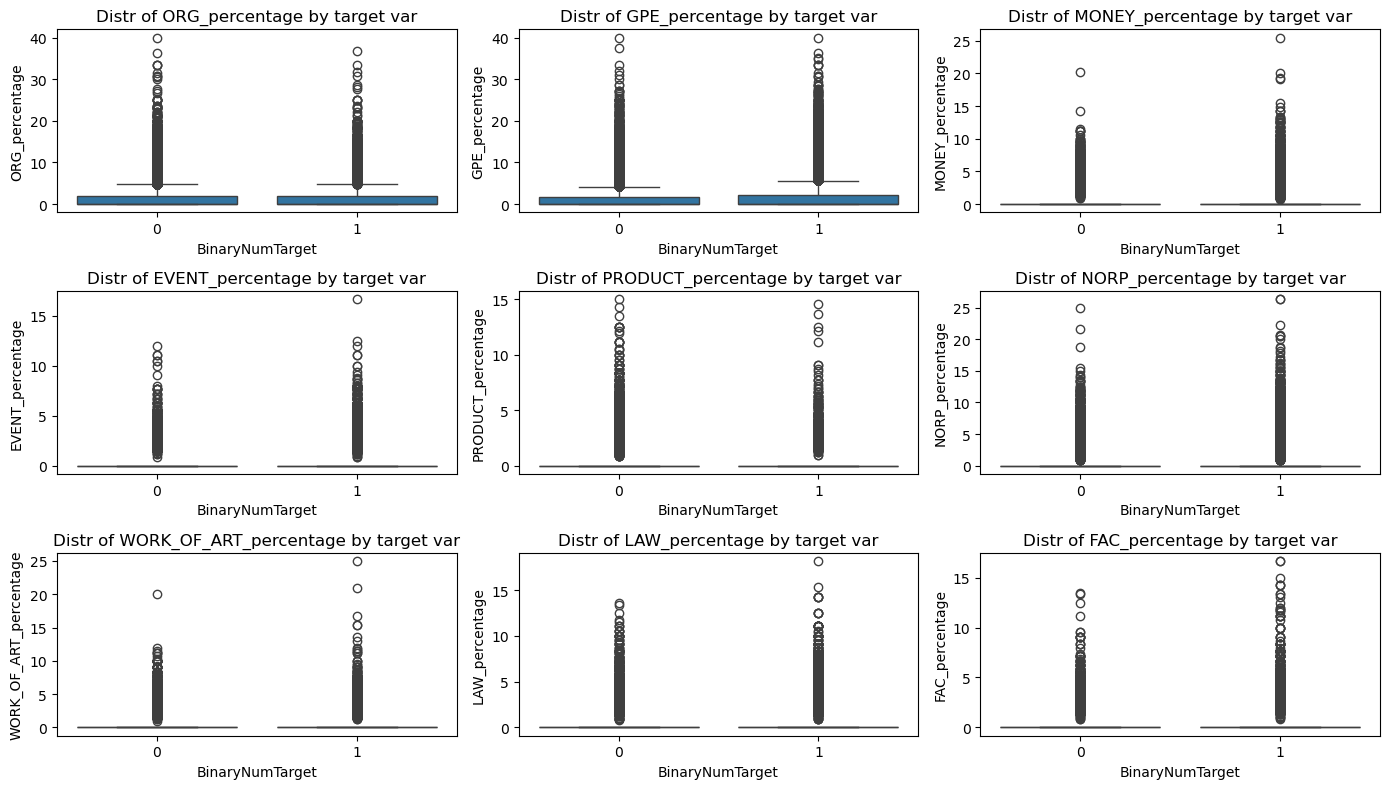

In [30]:
features = ['ORG_percentage', 'GPE_percentage', 'MONEY_percentage', 'EVENT_percentage', 'PRODUCT_percentage', 
            'NORP_percentage', 'WORK_OF_ART_percentage', 'LAW_percentage', 'FAC_percentage']
fig, ax = plt.subplots(3,3, figsize=(14, 8))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(x='BinaryNumTarget', y=feature, data=df, ax=ax[row, col])
    ax[row, col].set_title(f'Distr of {feature} by target var')
plt.tight_layout()
plt.show();

### Group 1, Batch 2

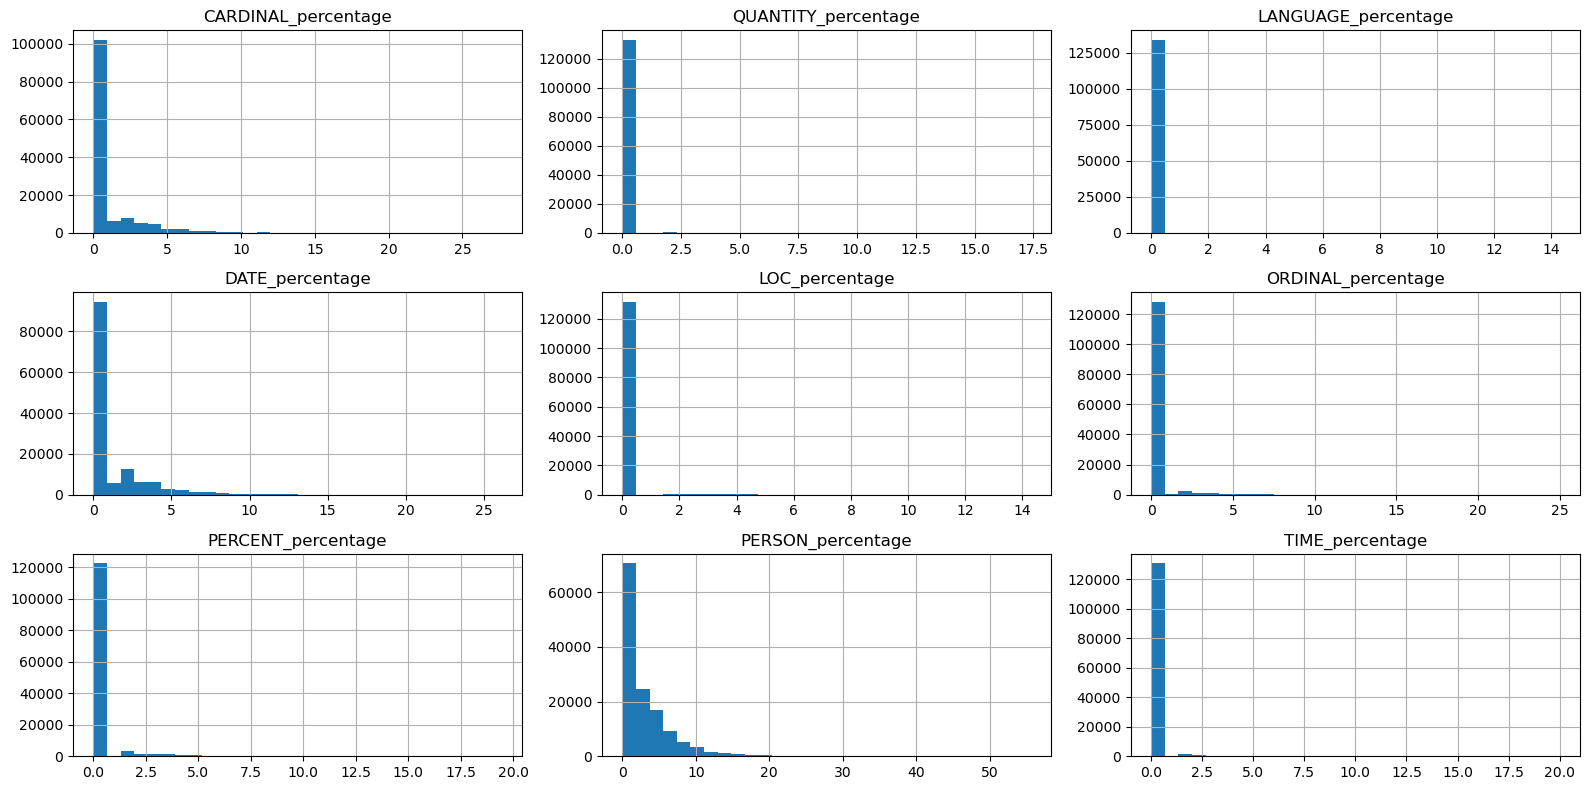

In [31]:
df.hist(['CARDINAL_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage', 'DATE_percentage', 'LOC_percentage', 'ORDINAL_percentage', 'PERCENT_percentage', 
'PERSON_percentage', 'TIME_percentage'], figsize=(16, 8), bins=30)
plt.tight_layout();

In [32]:
print(f"QUANTITY non zero records: {round(len(df[df['QUANTITY_percentage'] > 0])/len(df), 2)*100}%")
print(f"LANGUAGE non zero records: {round(len(df[df['LANGUAGE_percentage'] > 0])/len(df), 3)*100}%")
print(f"LOC non zero records: {round(len(df[df['LOC_percentage'] > 0])/len(df), 2)*100}%")
print(f"ORDINAL non zero records: {round(len(df[df['ORDINAL_percentage'] > 0])/len(df), 3)*100}%")
print(f"PERCENT non zero records: {round(len(df[df['PERCENT_percentage'] > 0])/len(df), 3)*100}%")
print(f"TIME non zero records: {round(len(df[df['TIME_percentage'] > 0])/len(df), 3)*100}%")

QUANTITY non zero records: 1.0%
LANGUAGE non zero records: 0.3%
LOC non zero records: 2.0%
ORDINAL non zero records: 4.3999999999999995%
PERCENT non zero records: 8.6%
TIME non zero records: 2.6%


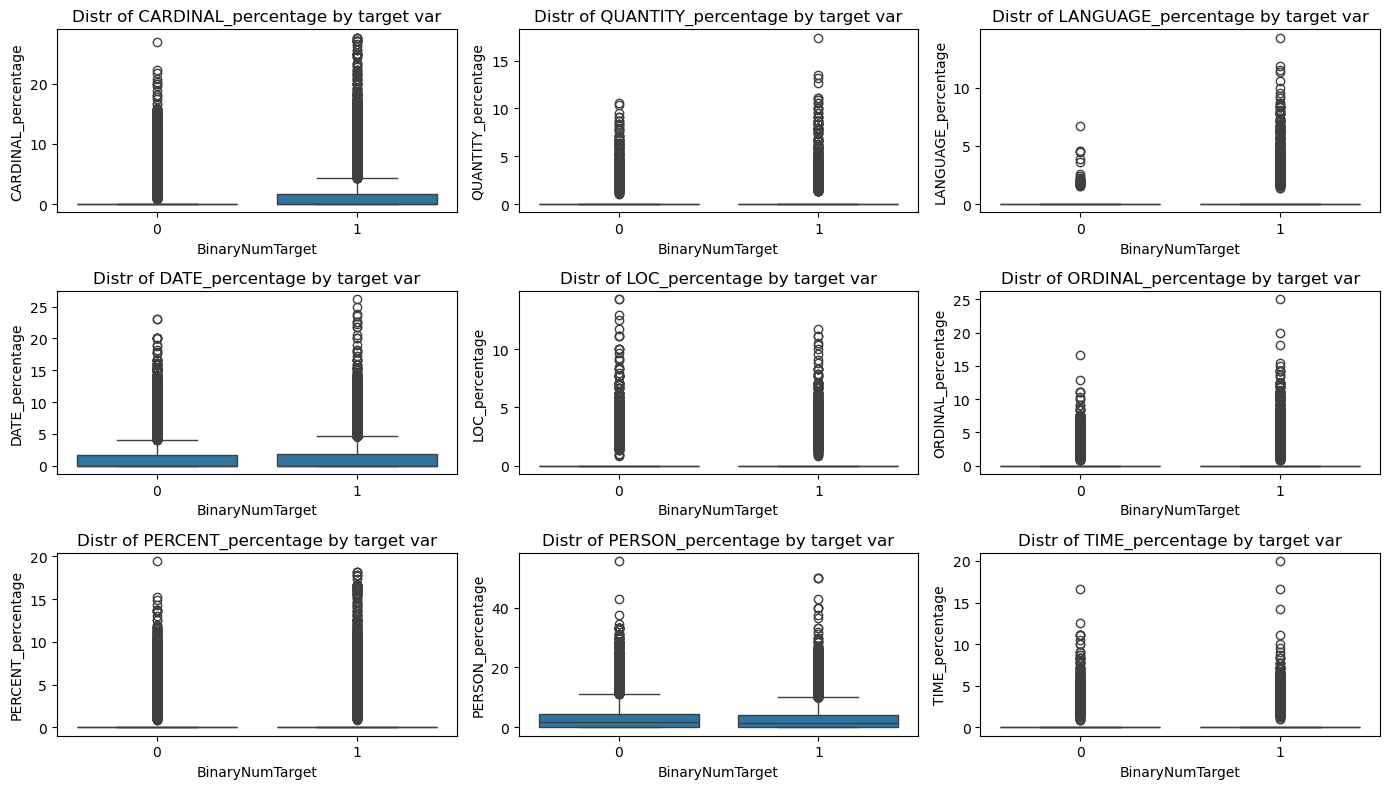

In [33]:
features = ['CARDINAL_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage', 'DATE_percentage', 'LOC_percentage', 'ORDINAL_percentage', 'PERCENT_percentage',
'PERSON_percentage', 'TIME_percentage']
fig, ax = plt.subplots(3,3, figsize=(14, 8))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(x='BinaryNumTarget', y=feature, data=df, ax=ax[row, col])
    ax[row, col].set_title(f'Distr of {feature} by target var')
plt.tight_layout()
plt.show();

**Some intermdiate inferences:**

From the distribution of values in this group we see that of the preprocessed tags users speak about:
- organizations,
- geopolitical entities,
- personalities,
- nationalities
- religios groups
- with dates and cardinal numbers.

Through all features in the group both real (1) and fake (0) news have similar distribution.

All features are heavily skewed towards 0, which means that relatively small part of tweets has these entities.

The boxplots demonstrate the lack of significant difference in distribution of the features between target classes. One exception is PERSON_percentage feature, there are more of tthat in the "real news" class.

All this suggests that these features alone cannot be strong predictors for distinguishing b/w fake/real news.

## Group 2, Linguistic Features

### Group 2, Batch 1

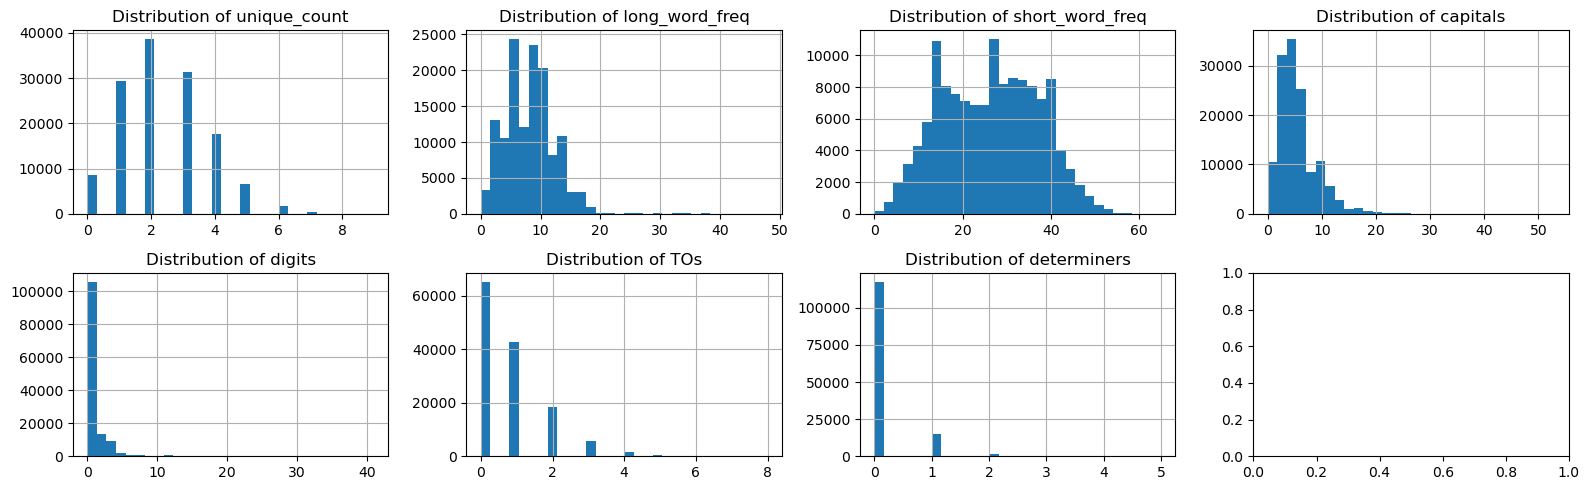

In [34]:
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
columns = ['unique_count', 'long_word_freq', 'short_word_freq', 'capitals', 'digits', 'TOs', 'determiners']
axes = axes.flatten()
for ax, col in zip(axes, columns):
    df[col].hist(bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show();

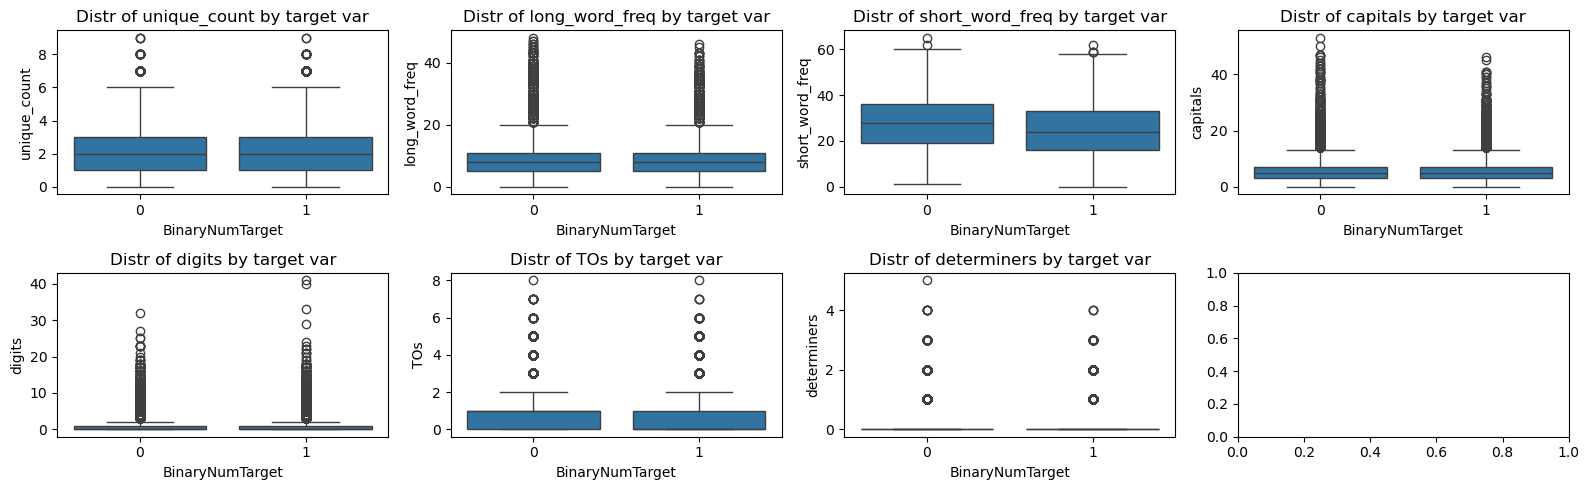

In [35]:
features = ['unique_count', 'long_word_freq', 'short_word_freq', 'capitals', 'digits', 'TOs', 'determiners']
fig, ax = plt.subplots(2,4, figsize=(16, 5))

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    sns.boxplot(x='BinaryNumTarget', y=feature, data=df, ax=ax[row, col])
    ax[row, col].set_title(f'Distr of {feature} by target var')
plt.tight_layout()
plt.show();

### Group 2, Batch 2

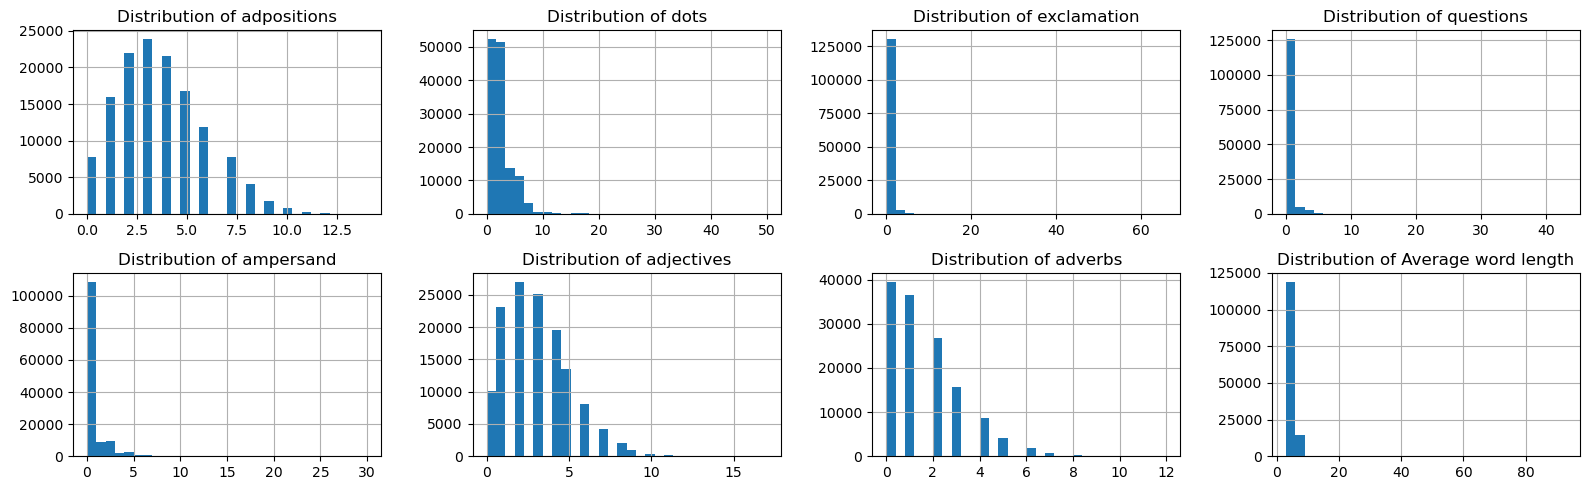

In [36]:
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
columns = ['adpositions', 'dots', 'exclamation', 'questions', 'ampersand', 'adjectives', 'adverbs', 'Average word length']
axes = axes.flatten()
for ax, col in zip(axes, columns):
    df[col].hist(bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show();

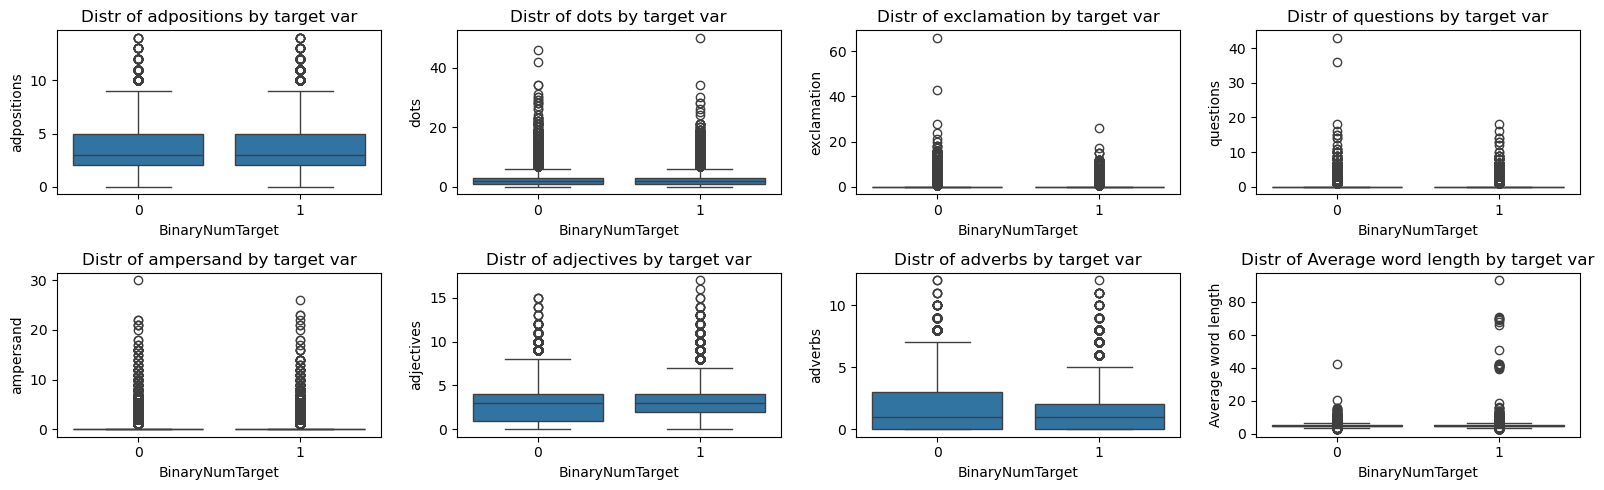

In [37]:
features = ['adpositions', 'dots', 'exclamation', 'questions', 'ampersand', 'adjectives', 'adverbs', 'Average word length']
fig, ax = plt.subplots(2,4, figsize=(16, 5))

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    sns.boxplot(x='BinaryNumTarget', y=feature, data=df, ax=ax[row, col])
    ax[row, col].set_title(f'Distr of {feature} by target var')
plt.tight_layout()
plt.show();

### Group 2, Batch 3

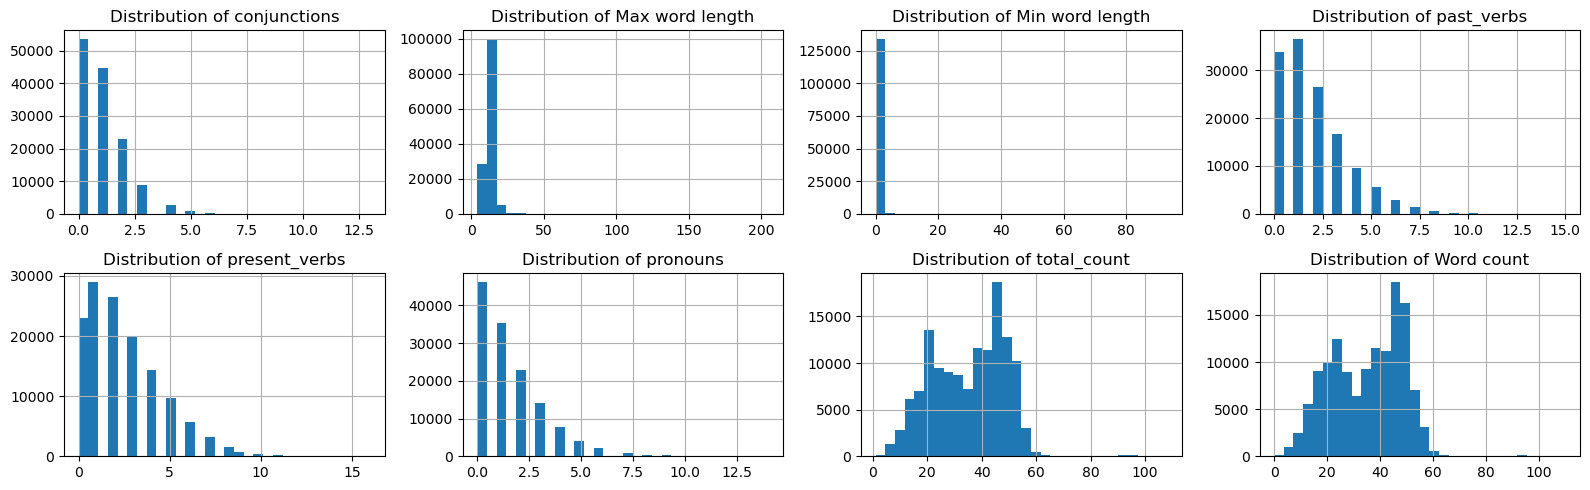

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
columns = ['conjunctions', 'Max word length', 'Min word length', 'past_verbs', 'present_verbs', 'pronouns', 'total_count', 'Word count']
axes = axes.flatten()
for ax, col in zip(axes, columns):
    df[col].hist(bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show();

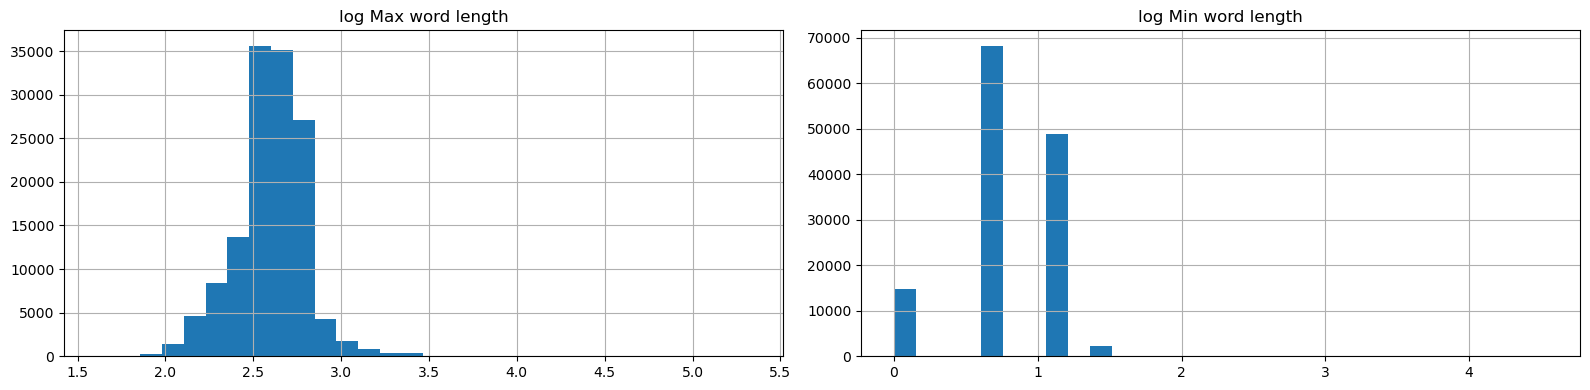

In [39]:
df_plot = pd.DataFrame({
                       # 'Max word length': df['Max word length'],
                       'log Max word length': np.log1p(df['Max word length']),
                       # 'Min word length': df['Min word length'],
                       'log Min word length': np.log1p(df['Min word length'])
                       })
df_plot.hist(figsize=(16, 4), bins=30)
plt.tight_layout();

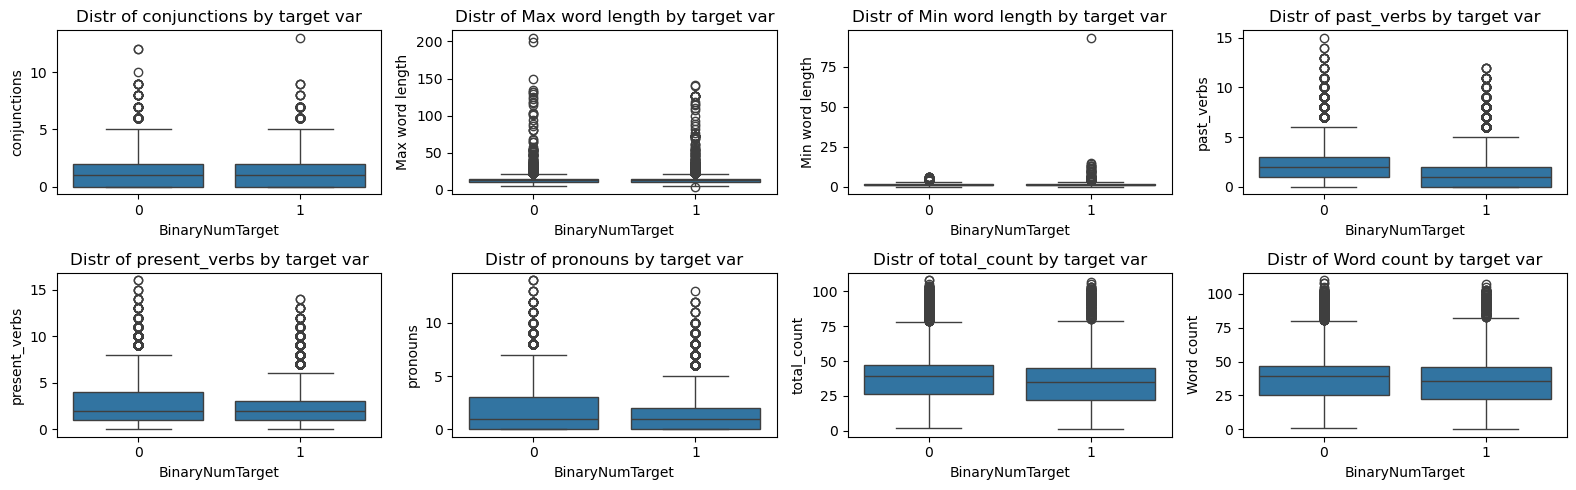

In [40]:
features = ['conjunctions', 'Max word length', 'Min word length', 'past_verbs', 'present_verbs', 'pronouns', 'total_count', 'Word count']
fig, ax = plt.subplots(2,4, figsize=(16, 5))

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    sns.boxplot(x='BinaryNumTarget', y=feature, data=df, ax=ax[row, col])
    ax[row, col].set_title(f'Distr of {feature} by target var')
plt.tight_layout()
plt.show();

It seems that while the "fake news" class more frequently uses verbs, adverbs pronouns, and adjectives than real news themessages are mostly shorter than real news. Otherwise the distributions patterns look similar to "real news" group, maybe with slightly larger dispersion in case of real news.

## Group 3, Twitter Specific

### Group 3, Batch 1

Due to the scale this data needs to be log-transformed. Just for the ref. -- this is how it originally looks.

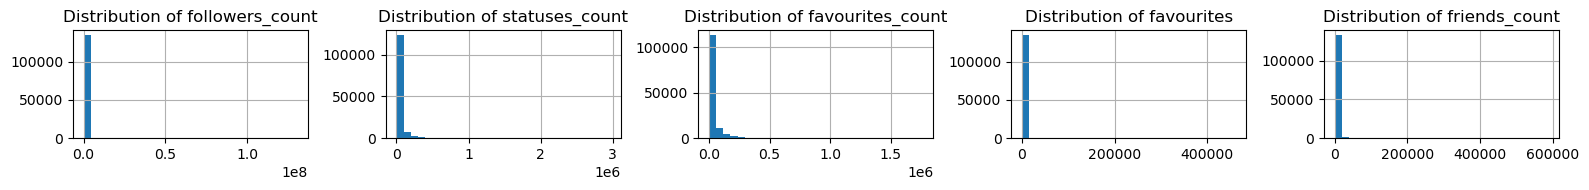

In [50]:
fig, axes = plt.subplots(1, 5, figsize=(16, 2))
columns = ['followers_count', 'statuses_count', 'favourites_count', 'favourites', 'friends_count']
axes = axes.flatten()
for ax, col in zip(axes, columns):
    df[col].hist(bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show();

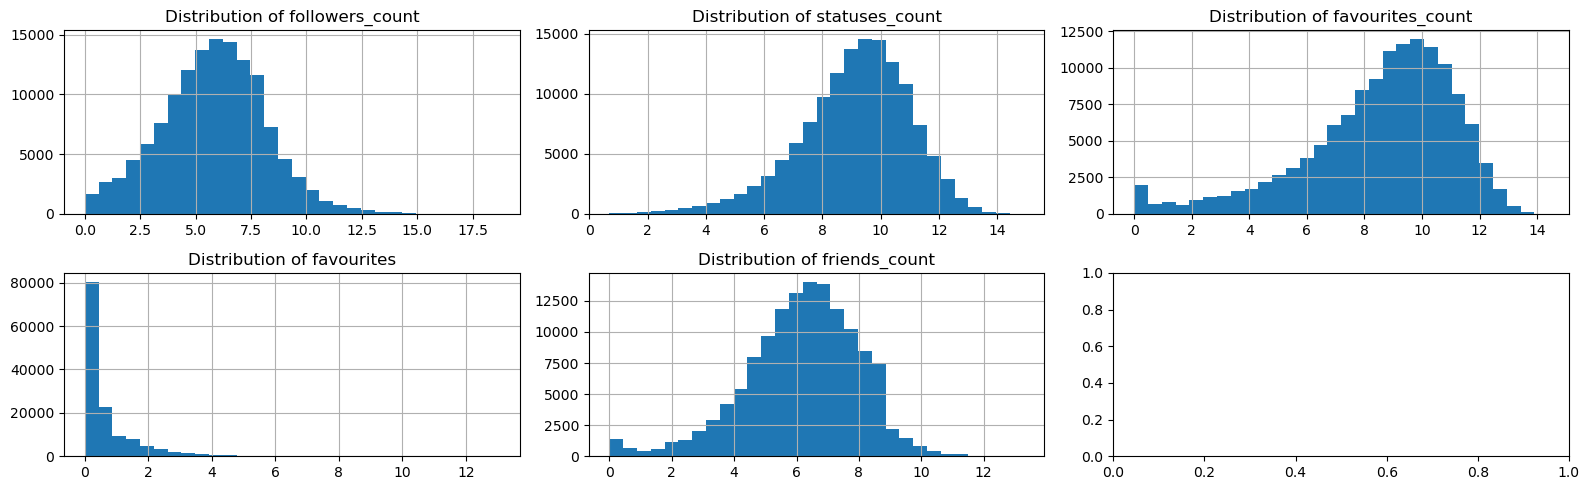

In [45]:
# log representation of favorites and friends count

df_plot = pd.DataFrame({'followers_count': np.log1p(df['followers_count']),
                        'statuses_count': np.log1p(df['statuses_count']),
                        'favourites_count': np.log1p(df['favourites_count']),
                        'favourites': np.log1p(df['favourites']),
                        'friends_count': np.log1p(df['friends_count'])})

fig, axes = plt.subplots(2, 3, figsize=(16, 5))
columns = ['followers_count', 'statuses_count', 'favourites_count', 'favourites', 'friends_count']
axes = axes.flatten()
for ax, col in zip(axes, columns):
    df_plot[col].hist(bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show();

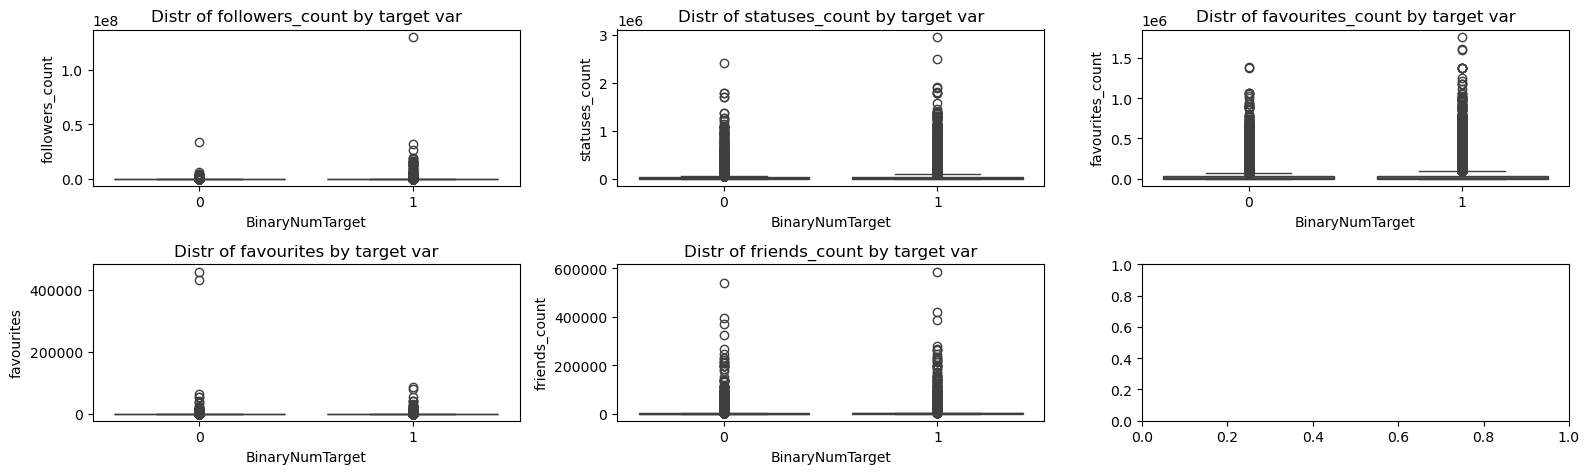

In [46]:
features = ['followers_count', 'statuses_count', 'favourites_count', 'favourites', 'friends_count']
fig, ax = plt.subplots(2,3, figsize=(16, 5))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(x='BinaryNumTarget', y=feature, data=df, ax=ax[row, col])
    ax[row, col].set_title(f'Distr of {feature} by target var')
plt.tight_layout()
plt.show();

### Group 3, Batch 2¶

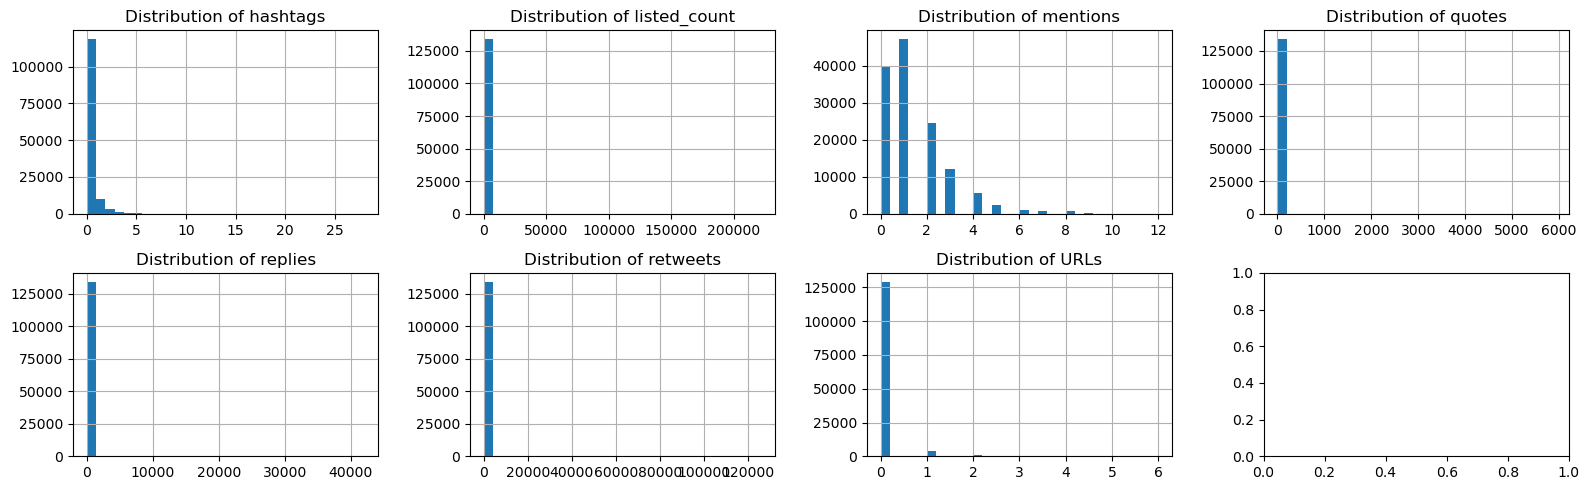

In [47]:
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
columns = ['hashtags', 'listed_count', 'mentions', 'quotes', 'replies', 'retweets', 'URLs']
axes = axes.flatten()
for ax, col in zip(axes, columns):
    df[col].hist(bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show();

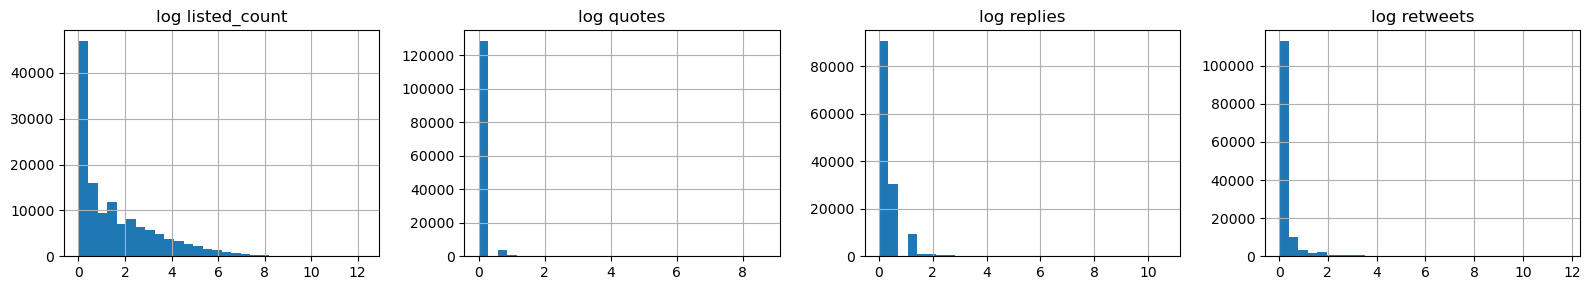

In [51]:
# same -- log representation of features
df_plot = pd.DataFrame({
                       # 'listed_count': df['listed_count'],
                       'log listed_count': np.log1p(df['listed_count']),
                       # 'quotes': df['quotes'],
                       'log quotes': np.log1p(df['quotes']),
                       # 'replies': df['replies'],
                       'log replies': np.log1p(df['replies']),
                       # 'retweets': df['retweets'],
                       'log retweets': np.log1p(df['retweets'])
})
fig, axes = plt.subplots(1, 4, figsize=(16, 3))
axes = axes.flatten()

for i, col in enumerate(df_plot.columns):
    df_plot[col].hist(ax=axes[i], bins=30)
    axes[i].set_title(col)

# df_plot.hist(figsize=(16, 8), bins=30)
plt.tight_layout();

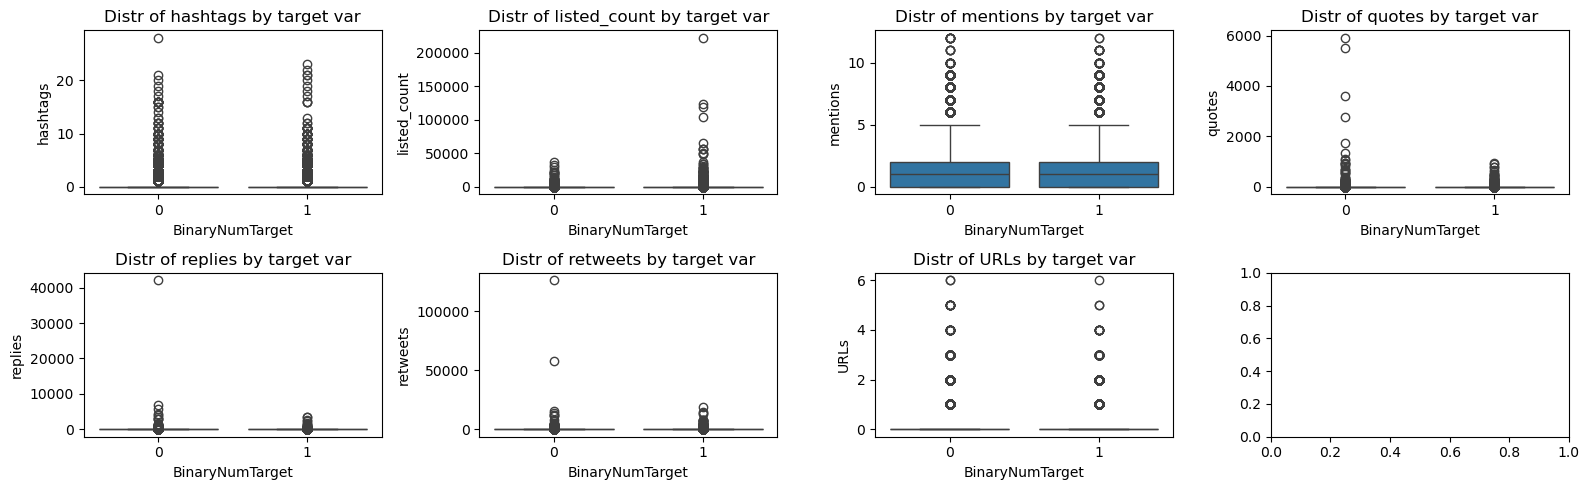

In [49]:
features = ['hashtags', 'listed_count', 'mentions', 'quotes', 'replies', 'retweets', 'URLs']
fig, ax = plt.subplots(2,4, figsize=(16, 5))

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    sns.boxplot(x='BinaryNumTarget', y=feature, data=df, ax=ax[row, col])
    ax[row, col].set_title(f'Distr of {feature} by target var')
plt.tight_layout()
plt.show();

Distribution of most of the twittter features look normal for social media data: a large number of users have relatively low values, and a smaller number of users have very high values.

'favourites' looks a bit different: most users have a moderate count of favourites, but some users have a much higher count, thus the long tail. Same for retweets and quotes. 'quotes' is from 0 to 5913, but there ate only 8 datapoints with quotes > 1000, and 116 datapoints > 100. So maybe we should consider dropping these outliers.

## Group 4, Auxiliary Scores

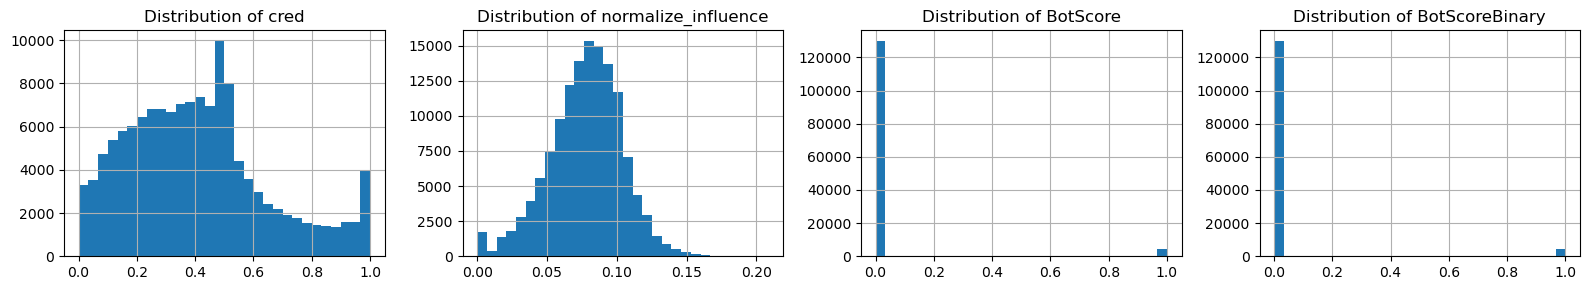

In [52]:
fig, axes = plt.subplots(1, 4, figsize=(16, 3))
columns = ['cred', 'normalize_influence', 'BotScore', 'BotScoreBinary']
axes = axes.flatten()
for ax, col in zip(axes, columns):
    df[col].hist(bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show();

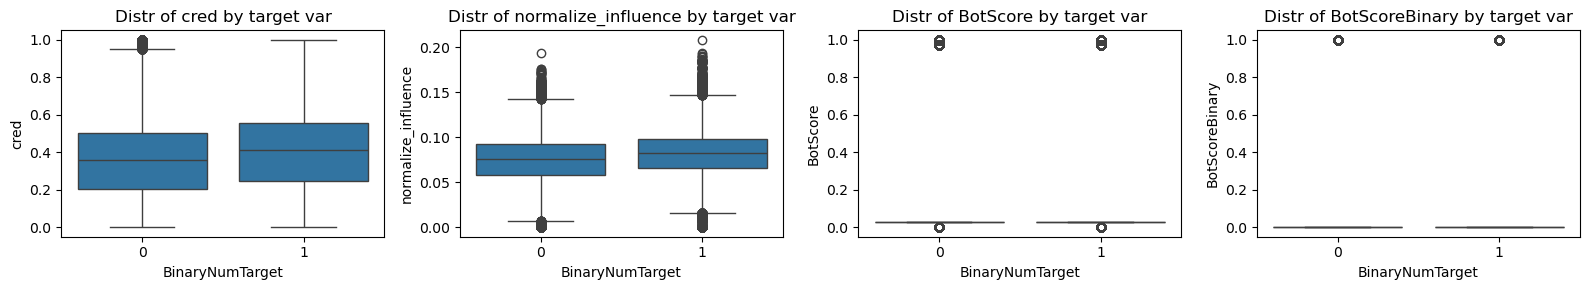

In [53]:
features = ['cred', 'normalize_influence', 'BotScore', 'BotScoreBinary']
fig, ax = plt.subplots(1,4, figsize=(16, 3))

for i, feature in enumerate(features):
    sns.boxplot(x='BinaryNumTarget', y=feature, data=df, ax=ax[i])
    ax[i].set_title(f'Distr of {feature} by target var')

plt.tight_layout()
plt.show();

'cred' (synthetic credibility score) is a bimodal feature with gap between two peaks. This means that most part has a lower credibility score (which is normal), then significantly fewer tweets have moderate credibility with only small number with higher credibility. 

The outliers in BinaryNumTarget=0 class indicate that some instances have exceptionally high cred scores. Maybe we could use that to create a new feature with normalize_influence. They could help in distinguishing F/R news.

Boxplots of target vs bot score show nothing significant, both classes have similar distribution of botscore values.

To sum up: 

The plots show that many features across all groups are heavily right-skewed indicating a non-normal distribution. 

As for **twitter** related features – that’s typical for social media data where only a small number of users have very high counts,few users have high counts, while most have low interaction. Common users rarely interact even if they are interested. 

The **spaCy tags** feature group also shows right-skewed distributions, with about 95% of datapoints being zero, suggesting these may be less important for ML modeling. 

Boxplots confirm the presence of outliers for both target classes, reinforcing the skewed distributions. 

Outliers need to be handled appropriately to improve model performance. There are no missing values, and the data types are relevant, indicating good data quality without the need for cleaning.

## Correlations

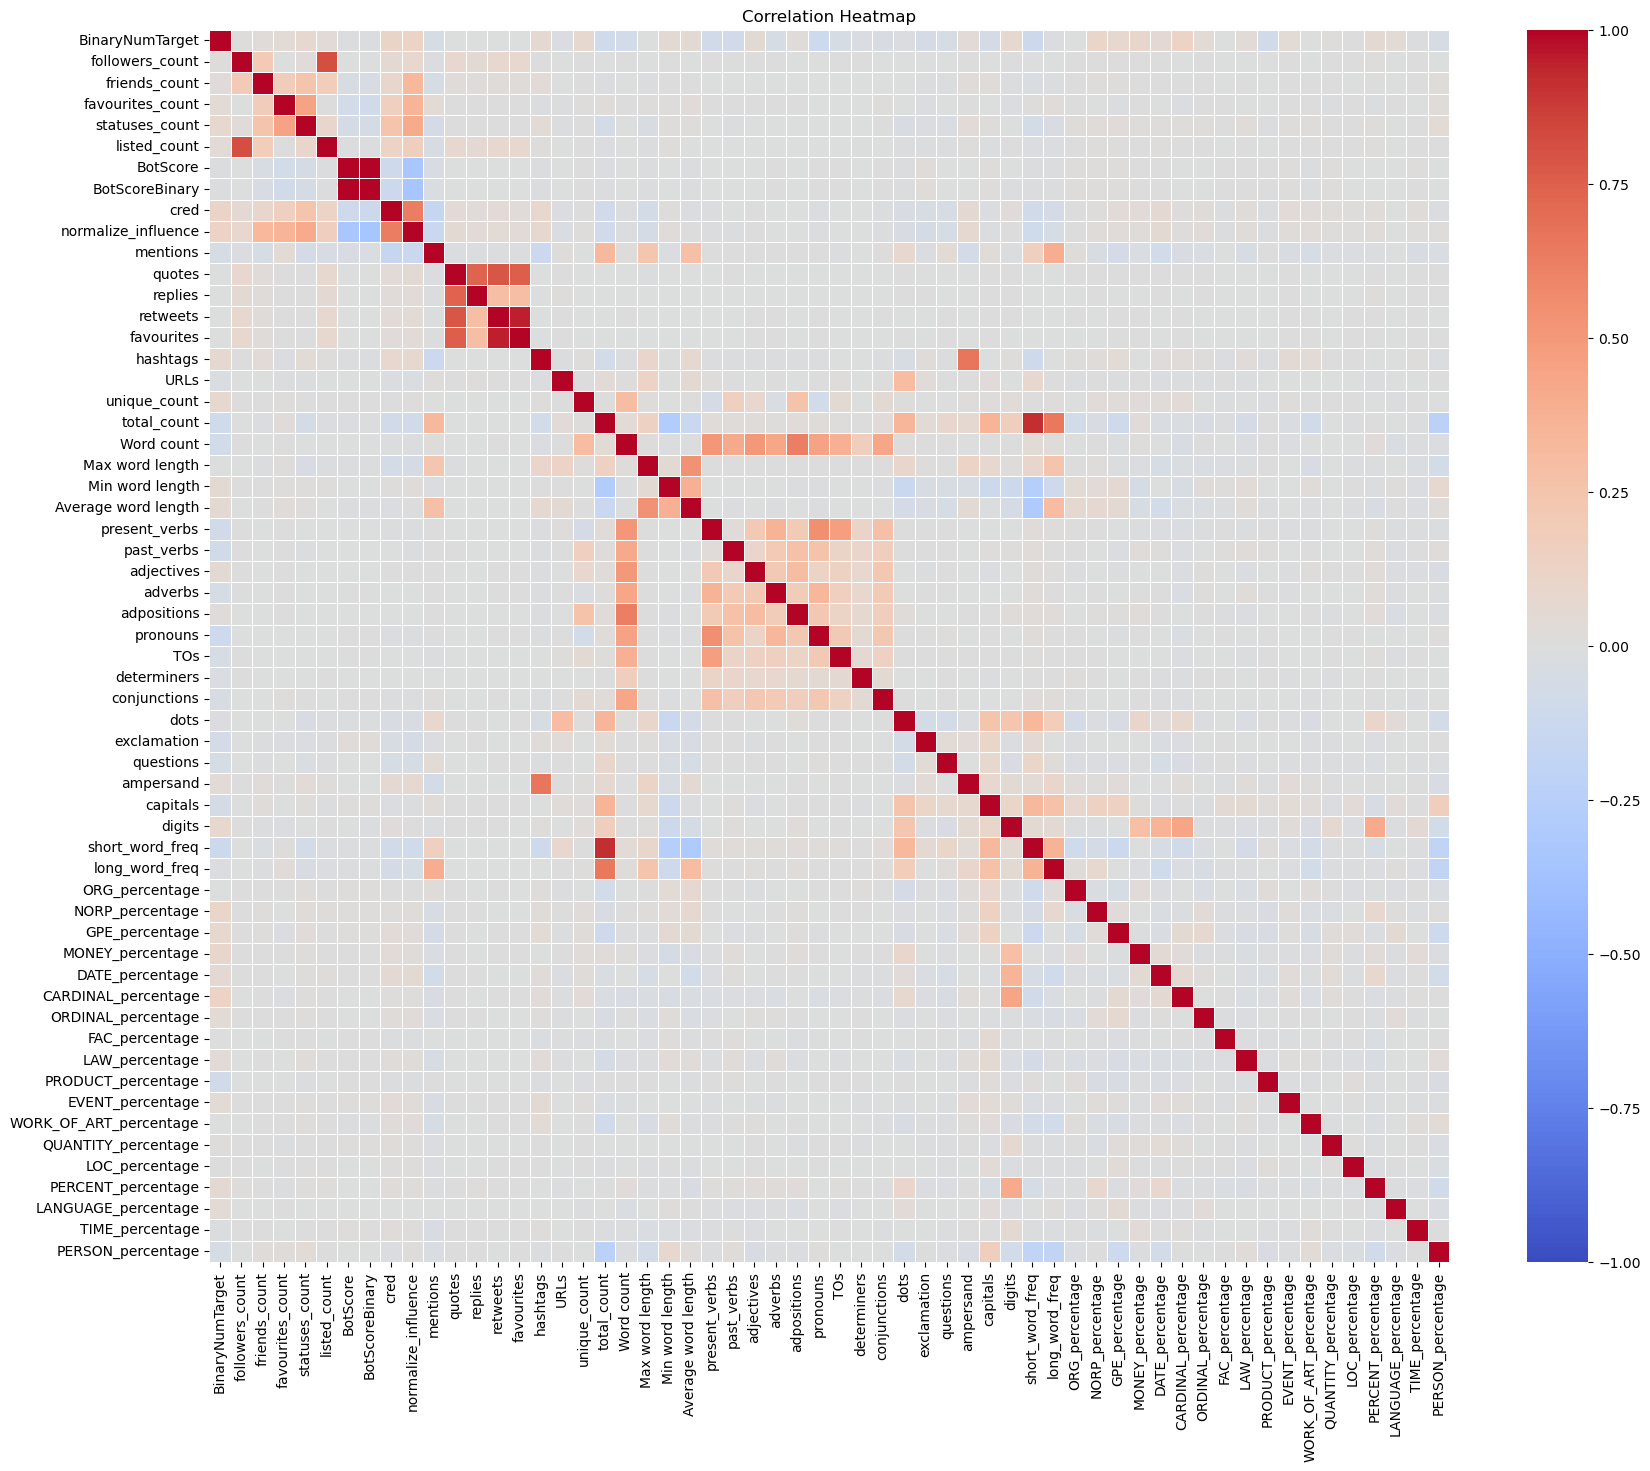

In [54]:
num_features = df.drop(columns=['statement', 'tweet'])
cor_matrix = num_features.corr()
plt.figure(figsize=(20, 16))

sns.heatmap(cor_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linecolor='white', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

There's a correlations between features like `followers_count`, `friends_count`, and `favourites_count`. This means that users with many followers also have many friends and favorites. But the correlation is subtle.

The spaCy tags show no correlations within the group, but they correlate with other feature groups. For instance: `DATE_percentage` and `CARDINAL_percentage` correlate with `digits` and `dots`, while `PERSON_percentage` correlates with `capitals`. Makes sense.

Within the lexical features, `short_word_freq` correlates with `total_count` -- that can mean that longer texts have more short words. And `long_word_freq` correlates with `word_count` rather than `total_count` which counts repeated words as well.


`normalized_influence` negatively correlates with bot scores and is linked to twitter-specific features like `followers_count` and `favourites_count`, but the correlation is weak. Features like `replies`, `retweets`, and `favourites` are correlated with `quotes`, as social network actions often occur together. High metrics in one area typically correspond to high metrics in others, while the opposite may suggest bot activity.

Overall, many features are skewed with long tails and numerous outliers, especially within the spaCy tags group. The next step is to reduce the number of dimensions and evaluate model effectiveness with the reduced feature set. 

## Feature engineering

#### Ratio long/short words

Given the relationship between `short_word_freq` and `long_word_freq`, we can combine them into a ratio. To avoid cases where there are more longer words than short, which will lead to values beyond these boundaries, ratio will be calculated like that:

> 1-`long_word_freq`/(`long_word_freq` + `short_word_freq`) 

as a measure of complexity of text with values between 0 (less complex) and 1 (more complex). Thus later we (probably) can drop these two features.

Why not total_count:

That feature includes mentions, urls and hashtags. We want only text of the message that takes into account only of these two features.

In [ ]:
data['ratio_short_to_long'] = data.apply(lambda row: round((1 - row['long_word_freq'] / (row['short_word_freq'] + row['long_word_freq'])), 2) if row['short_word_freq'] > 0 else float(0), axis=1)
# data['ratio_short_to_long'] = data.apply(lambda row: round((1 - row['long_word_freq'] / (row['short_word_freq'] + row['long_word_freq'])), 2) if row['short_word_freq'] > 0 else float('inf'), a

<Axes: >

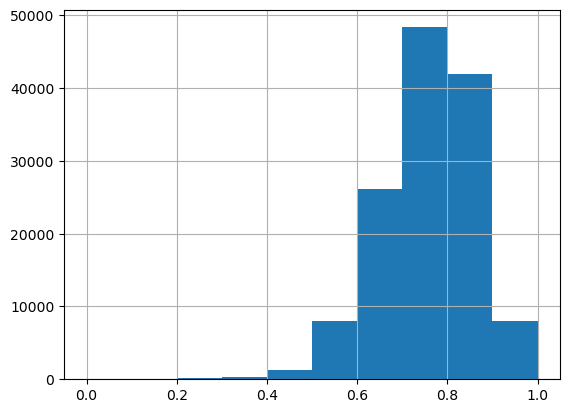

In [68]:
df['ratio_short_to_long'].hist()

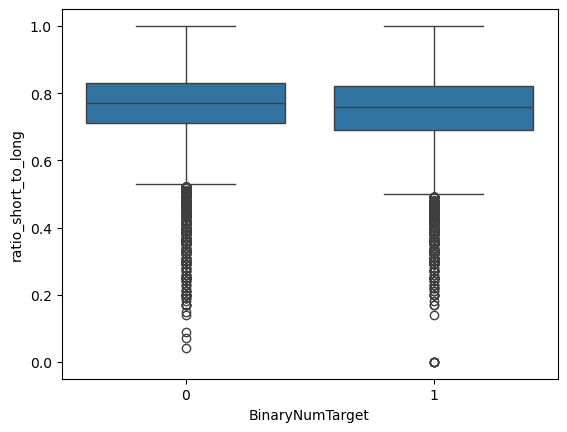

In [69]:
sns.boxplot(x='BinaryNumTarget', y='ratio_short_to_long', data=df);

The distribution of ratio_short_to_long indicates that mostly the messages tend to be more complex. The distribution of ratio values is heavily left skewed with long tail at the start.

#### Engagement

Since there's such correlation between `replies`, `retweets`, `favourites` and `quotes`, we could combine them into one feature, as they all represent different forms of user engagement with a tweet.

To capture combined engagement, we'll create this feature:

>df['total_engagement'] = np.log1p(df['replies'] + df['retweets'] + df['favorites'] + df['quotes']) / np.log1p(df['favorites_count'])

In [75]:
df.head(1)

,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,short_word_freq,long_word_freq,ratio_short_to_long,ORG_percentage,NORP_percentage,GPE_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LOC_percentage,PERCENT_percentage,LANGUAGE_percentage,TIME_percentage,PERSON_percentage,total_engagement
0,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,1,"@POTUS Biden Blunders - 6 Month Update\n\nInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?",4262,3619,34945,16423,44,0.03,0,0.540794,0.104602,1,1,1,3,10,0,0,5,40,42,18,0,5.8,1,1,1,0,4,1,0,0,0,5,0,1,0,22,2,26,12,0.68,3.571429,1.785714,1.785714,1.785714,1.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.785714,15


In [159]:
# and to avoid division by 0 we'll add a small constant
df['total_engagement'] = np.log1p(df['replies'] + df['retweets'] + df['favourites'] + df['quotes']) / np.log1p(df['favourites_count'] + 1e-10)

In [162]:
df['total_engagement'] = df['total_engagement'].astype('float32')

In [160]:
print(df['total_engagement'].isnull().sum())  # Check for NaN
print(np.isinf(df['total_engagement']).sum())  # Check for inf values

0
0


We have NaNs due to division by 0 and values and infinite numbers. To address that we'll replace infinite numbers with very large aand NaNs -- with 0s

In [145]:
# df['total_engagement'] = df['total_engagement'].replace([np.inf, -np.inf], np.finfo(np.float64).max)

In [146]:
# df['total_engagement'] = df['total_engagement'].fillna(df['total_engagement'].median())

<Axes: >

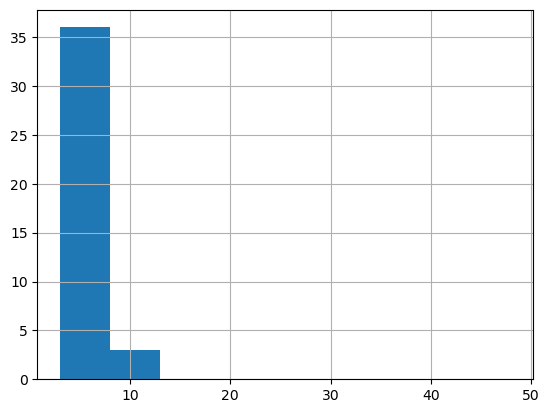

In [147]:
# Ok, now let's see how it looks
bins = list(range(3, 50, 5))
df['total_engagement'].hist(bins=bins)

In [148]:
# How many 0 values are there?

zero_count = (df['total_engagement'] == 0).sum()
total_count = len(df['total_engagement'])
percentage = (zero_count / total_count) * 100

print(f"Number of zero values in total_engagement: {zero_count}")
print(f"Percentage of zero values: {percentage:.2f}%")

Number of zero values in total_engagement: 58693
Percentage of zero values: 43.74%


#### Activity index

The `followers_count` (how many followers) and `listed_count` (how many tweets the user has in lists) are correlated enough to use them for feature engineering. 

## Text analysis

This is not a part of a statistical analysis, but it's interesting to see the language used in the discussion of the headlines and compare the fake/real news or top topics  vocabulary. Next step could be a sentiment analysis, but that would be a major side step from the purpose of this project, so we'll stop on a halfway.

In [278]:
# from collections import Counter
from wordcloud import WordCloud

In [279]:
statements = df['statement'].value_counts()

top_10_statements = statements.head(10).index # mask for top 10 by number of tweets. these are 10 most discussed statements
top_10_df = df[df['statement'].isin(top_10_statements)] # apply the mask to dataset

grouped_df = top_10_df.groupby('statement')['tweet'].apply(lambda x: ' '.join(x)).reset_index() # group tweets by statements, these 10 only

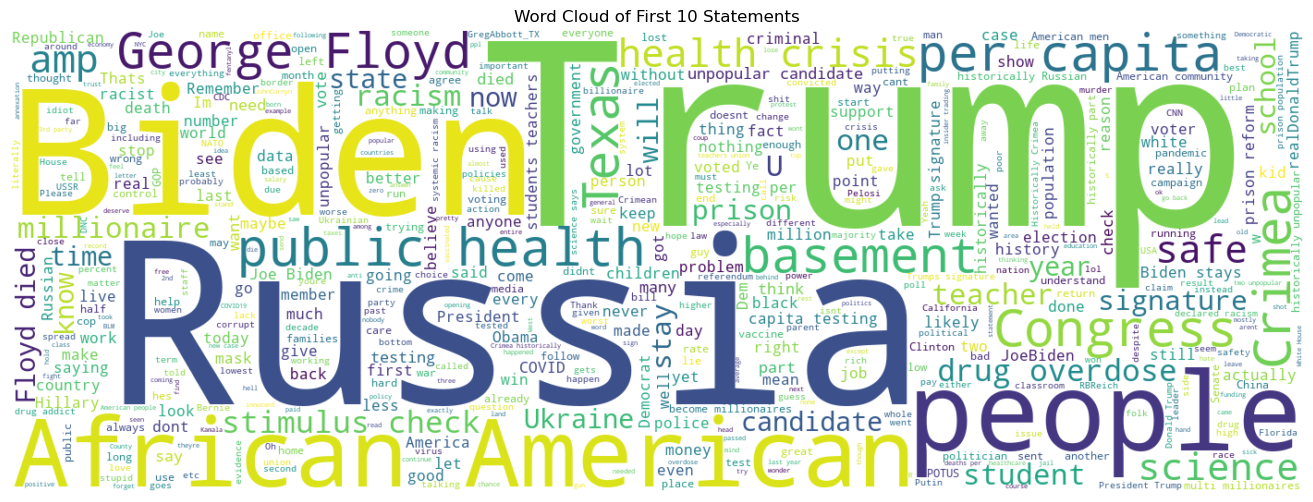

In [282]:
# statement0 = grouped_df.iloc[0]['tweet']

all_keywords = ' '.join(grouped_df['tweet'])

wordcloud = WordCloud(width=1400, height=500, max_words=500, background_color='white').generate(all_keywords)

plt.figure(figsize=(17, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of First 10 Statements')
plt.show();

### Merge with keywords

We're going to append 'manual_keywords' feature from the NLP dataset (which is essentially thematics of the statements -- politics, ecomomy, health and so on). We need it just for this goal -- to see the distribution of the vocabulary across the topics. Then we're going to drop that feature, so in the next steps this feature is not being taken into account.

In [283]:
df.shape

(134198, 63)

In [210]:
topics = pd.read_csv('../data/Original_data/Truth_Seeker_Model_Dataset.csv')
topics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               134198 non-null  int64  
 1   author                   134198 non-null  object 
 2   statement                134198 non-null  object 
 3   target                   134198 non-null  bool   
 4   BinaryNumTarget          134198 non-null  float64
 5   manual_keywords          134198 non-null  object 
 6   tweet                    134198 non-null  object 
 7   5_label_majority_answer  134198 non-null  object 
 8   3_label_majority_answer  134198 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 8.3+ MB


In [286]:
# topics.head(3)

Since the datapoints are in the same order we can just merge these.

In [213]:
df['topic'] = topics['manual_keywords']
df.head(1)

,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,BotScore,BotScoreBinary,cred,normalize_influence,mentions,quotes,replies,retweets,favourites,hashtags,URLs,unique_count,total_count,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,adverbs,adpositions,pronouns,TOs,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,short_word_freq,long_word_freq,ratio_short_to_long,ORG_percentage,NORP_percentage,GPE_percentage,MONEY_percentage,DATE_percentage,CARDINAL_percentage,ORDINAL_percentage,FAC_percentage,LAW_percentage,PRODUCT_percentage,EVENT_percentage,WORK_OF_ART_percentage,QUANTITY_percentage,LOC_percentage,PERCENT_percentage,LANGUAGE_percentage,TIME_percentage,PERSON_percentage,total_engagement,topic
0,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,1,"@POTUS Biden Blunders - 6 Month Update\n\nInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?",4262,3619,34945,16423,44,0.03,0,0.540794,0.104602,1,1,1,3,10,0,0,5,40,42,18,0,5.8,1,1,1,0,4,1,0,0,0,5,0,1,0,22,2,26,12,0.68,3.571429,1.785714,1.785714,1.785714,1.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.785714,0.265026,"Americans, eviction moratorium"


In [289]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)

# Just to see the 100 top topics
df['topic'].unique().tolist()[:10]

['Americans, eviction moratorium',
 'Trump administration, 5000,taliban',
 'afghanistan, 100 billion dollars',
 'Florida, COVID-19, patients, floor',
 '50 years, minimum wage, inflation',
 'record 9.3 million, job openings',
 '1978, CEO compensation',
 'Wisconsin,positive, fund',
 'Chicago, Board of Education, opposition',
 'Texas, more job openings']

In [290]:
df[['statement', 'tweet', 'topic']].head()

,statement,tweet,topic
0,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,"@POTUS Biden Blunders - 6 Month Update\n\nInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?","Americans, eviction moratorium"
1,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,"@S0SickRick @Stairmaster_ @6d6f636869 Not as many people are literally starving and out in the streets as they were in the 19th century. Isnt capitalism grand?\n\nMeanwhile, were facing an eviction moratorium threatening to make millions of Americans homeless.\n\nFuck off with this corporatist propaganda.","Americans, eviction moratorium"
2,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,THE SUPREME COURT is siding with super rich property owners and over poor struggling AMERICANS by blocking the eviction moratorium during a pandemic which isn't even over yet. ASSHOLES! get ready for more homeless people!,"Americans, eviction moratorium"
3,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,"@POTUS Biden Blunders\n\nBroken campaign promises, Inflation, Delta mismanagement, Dems without leadership, Abandoned Americans &amp; Armed the Taliban, S. Border crisis, Breaking job growth, Abuse of power (61 Exec Orders, $1.9T+ in Reconciliation, Eviction Moratorium, Vaccine Mandates)","Americans, eviction moratorium"
4,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,"@OhComfy I agree. The confluence of events right now is unprecedented (Afghan disaster, bombing, overturning of the eviction moratorium, collapse of Biden admin credibility). If images come out of Americans being executed by Taliban, SHTF.","Americans, eviction moratorium"


Here we want to get top 10 statements by number of tweets from 10 different topics.

In [295]:
statement_topic_counts = df.groupby(['statement', 'topic']).size().reset_index(name='tweet_count') # vCreate subset with all topics and statements with number of tweets attribbuted to them
sorted_statements = statement_topic_counts.sort_values(by='tweet_count', ascending=False)

top_statements = sorted_statements.groupby('topic').head(1) # group tweets by topics and pick top1 from each
top_10_statements = top_statements.head(10) #

In [296]:
top_10_statements.sort_index(inplace=True)

In [297]:
top_10_df = df[df['statement'].isin(top_10_statements['statement'])] # apply the mask to dataset

grouped_10_df = top_10_df.groupby('statement')['tweet'].apply(lambda x: ' '.join(x)).reset_index() # group tweets by statements, these 10 only

In [306]:
# what topics we have
top_10_statements.topic

53           Crimea, historically, Russia
70                 congress, millionaires
161          racism, public health crisis
383        science safe teachers students
418           candidates, 2016, unpopular
447     George Floyd, died, drug overdose
456       trump,signature,stimulus checks
752                Biden, stays, basement
822             Texas, testing per capita
828    Warren Buffet, secretary, tax rate
Name: topic, dtype: object

In [340]:
grouped_10_df.iloc[2]['statement']

'"Our health department, our city and our county declared racism as a public health crisis last year.'

Show wordcloud for statements 3 texts

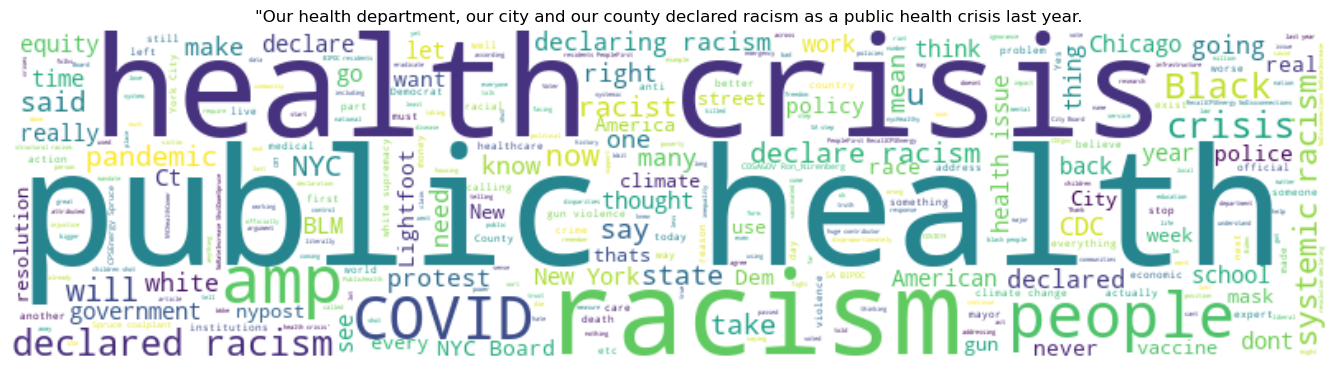

In [338]:
all_keywords_10_topics = ' '.join(grouped_10_df[2:3]['tweet'])

wordcloud = WordCloud(width=800, height=200, max_words=300, background_color='white').generate(all_keywords_10_topics)

plt.figure(figsize=(17, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(grouped_10_df[2:3].statement.values[0])
plt.show();

Next, we could perform sentiment analysis of the texts - separately for headlines and for real and fake news. However, this is beyond the scope of the project.

In [168]:
# df_slice = df[:10]

# Data with new features and converted to effective datatypes is saved here:

# Save df to parquet
# corrected_file_path = '../data/dataset.parquet'
# df.to_parquet(corrected_file_path, index=False)

# Load df from parquet
# df = pd.read_parquet(corrected_file_path)
